In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt


os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

#GPU configaration
If memory growth is enabled for a PhysicalDevice, the runtime initialization will not allocate all memory on the device.
"""

gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

#Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


#Display Images

Image (#9): Which is digit '4'


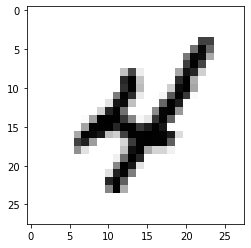

In [3]:
digit = 9 #Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

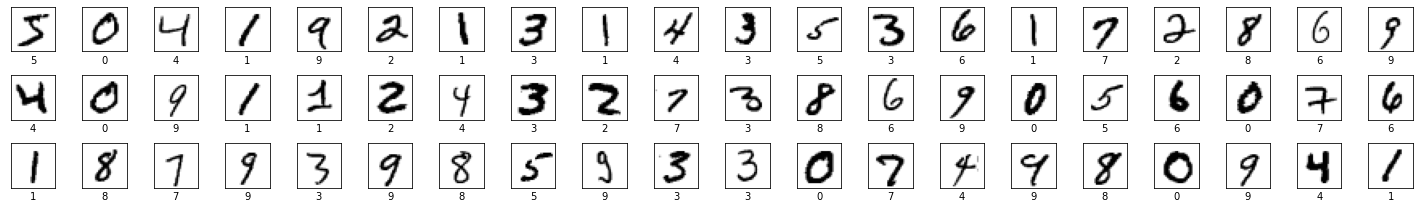

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
#with normalization
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

#without normalization
x2_train = x_train.reshape(-1, 28,28,1)
x2_test = x_test.reshape(-1, 28,28,1)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


Image (#9): Which is digit '4'


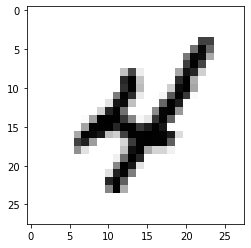

In [6]:
digit = 9 #Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

#Build The Model

#**Adam Optimizer**
#**Normalized Data**

In [7]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


#Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
*   **Loss function** — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
*   **Optimizer** — This is how the model is updated based on the data it sees and its loss function.
*   **Metrics** — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
"""



In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#Train the model
* **one epoch** = one forward pass and one backward pass of all the training examples
* **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
> * **number of iterations** = number of passes, each pass using [ batch size ] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).
* **validation_split** last $x$% of your traning data is used as a validation dataset.
Example: if you have 500 training examples, and your batch size is 250, then it will take 2 iterations to complete 1 epoch.

In [9]:
#Normalized Data
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 114s 301ms/step - loss: 0.2134 - accuracy: 0.9360 - val_loss: 0.0890 - val_accuracy: 0.9723
Epoch 2/5
375/375 [==============================] - 114s 303ms/step - loss: 0.0631 - accuracy: 0.9811 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 3/5
375/375 [==============================] - 115s 306ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0565 - val_accuracy: 0.9836
Epoch 4/5
375/375 [==============================] - 113s 300ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0575 - val_accuracy: 0.9829
Epoch 5/5
375/375 [==============================] - 113s 301ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0597 - val_accuracy: 0.9833


#Plot the training results

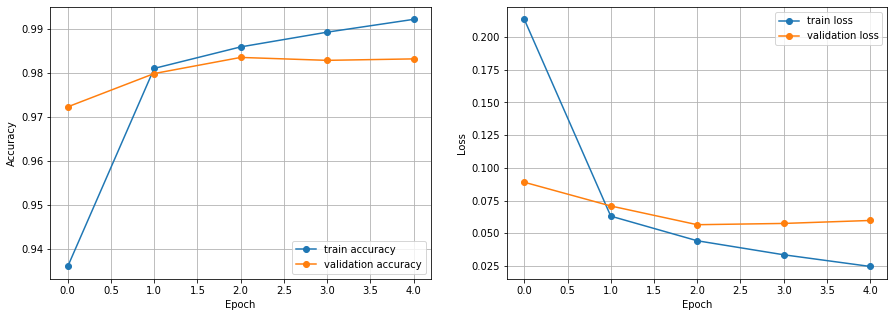

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#Evaluate the model on the test dataset

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.0488 - accuracy: 0.9850

Test accuracy: 0.9850000143051147


#Make predictions on the entire test images

In [12]:
predictions = model.predict(x_test)

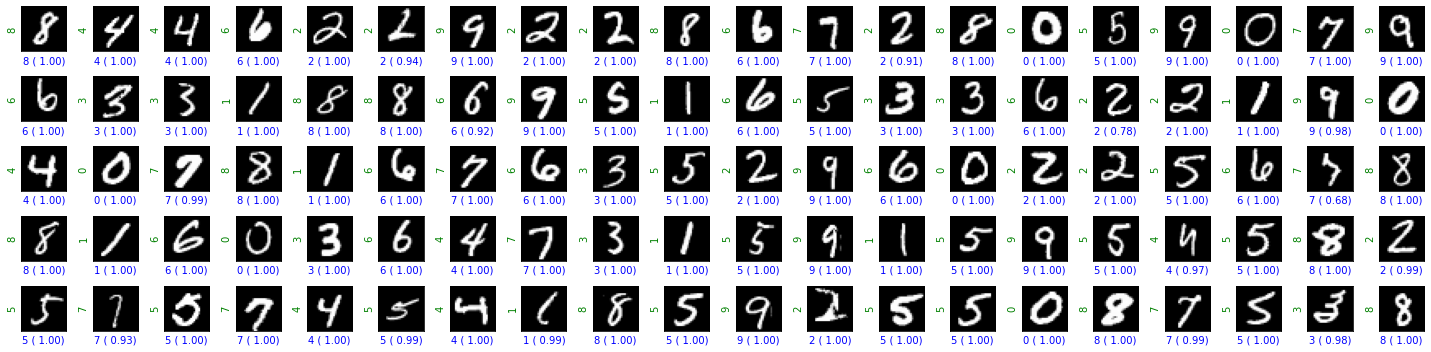

In [13]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#**Without Normalization**

In [14]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
# without normalize data
h2 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 59s 156ms/step - loss: 0.2637 - accuracy: 0.9201 - val_loss: 0.0948 - val_accuracy: 0.9710
Epoch 2/5
375/375 [==============================] - 57s 151ms/step - loss: 0.0654 - accuracy: 0.9794 - val_loss: 0.0578 - val_accuracy: 0.9834
Epoch 3/5
375/375 [==============================] - 57s 153ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0523 - val_accuracy: 0.9846
Epoch 4/5
375/375 [==============================] - 57s 152ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0520 - val_accuracy: 0.9858
Epoch 5/5
375/375 [==============================] - 57s 153ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0457 - val_accuracy: 0.9872


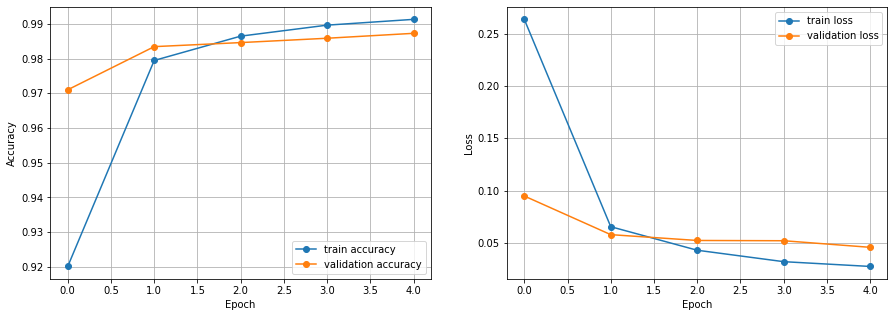

In [17]:
#without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [18]:
#without normalization
test_loss2, test_acc2 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 3s 11ms/step - loss: 0.0368 - accuracy: 0.9886

Test accuracy: 0.9886000156402588


In [19]:
#without normalization
predictions2 = model.predict(x2_test)


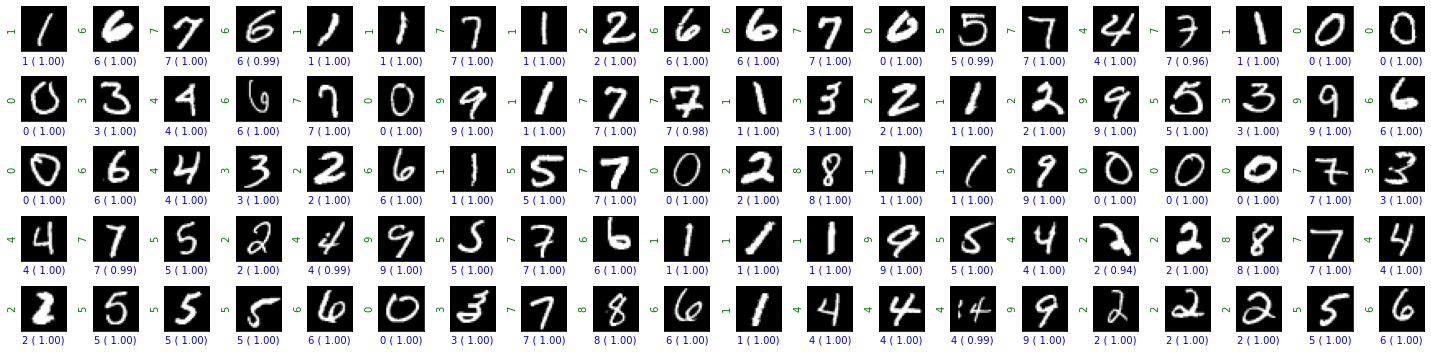

In [20]:
#without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions2 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions2[i]) 
        confidence = predictions2[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#*Test accuracy with **normalized data** is Test accuracy: **0.9850000143051147** and **without normalized data** is Test accuracy: **0.9886000156402588** so we can see that with normalized data we get more accurate ouput*

#**SGD Optimizer**

#**Normalized Data**

In [21]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [22]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
#normalize data
h3 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 57s 152ms/step - loss: 2.0572 - accuracy: 0.3574 - val_loss: 0.7907 - val_accuracy: 0.7973
Epoch 2/5
375/375 [==============================] - 57s 152ms/step - loss: 0.5054 - accuracy: 0.8434 - val_loss: 0.2922 - val_accuracy: 0.9122
Epoch 3/5
375/375 [==============================] - 58s 154ms/step - loss: 0.2809 - accuracy: 0.9146 - val_loss: 0.2144 - val_accuracy: 0.9350
Epoch 4/5
375/375 [==============================] - 58s 155ms/step - loss: 0.2016 - accuracy: 0.9379 - val_loss: 0.1615 - val_accuracy: 0.9522
Epoch 5/5
375/375 [==============================] - 57s 153ms/step - loss: 0.1560 - accuracy: 0.9513 - val_loss: 0.1552 - val_accuracy: 0.9523


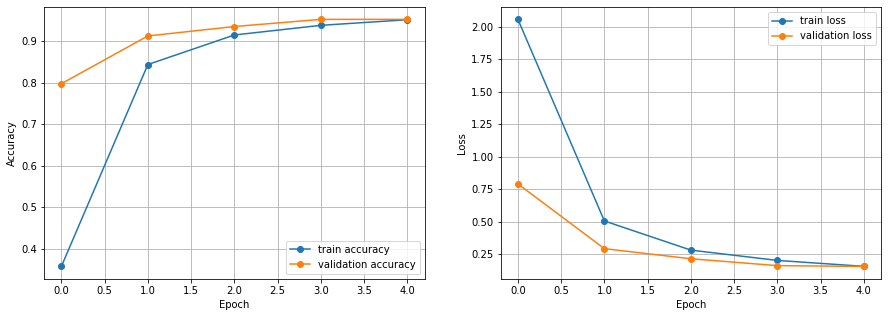

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [25]:
test_loss3, test_acc3 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.1414 - accuracy: 0.9558

Test accuracy: 0.9850000143051147


In [26]:
predictions3 = model.predict(x_test)

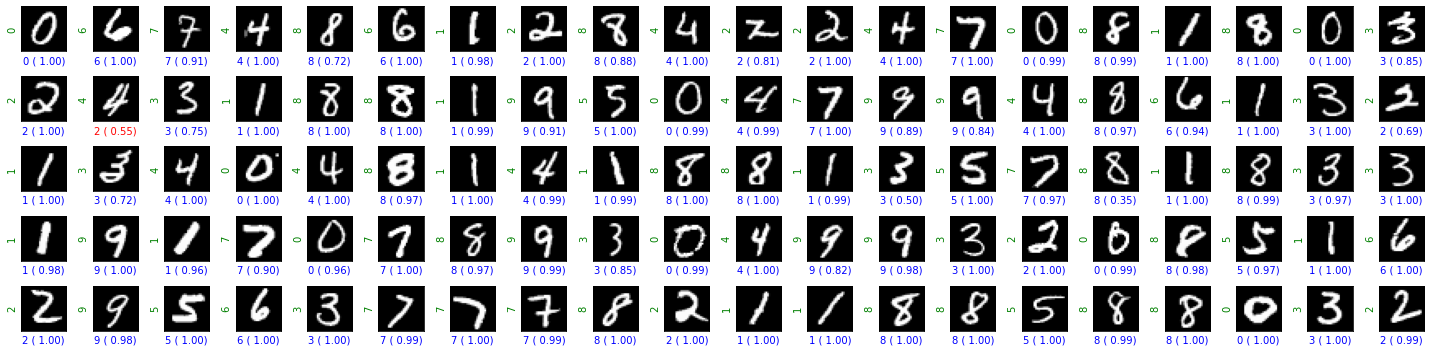

In [27]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions3 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions3[i]) 
        confidence = predictions3[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#**Without Normalization**

In [28]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [29]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [30]:
#without normalize data
h4 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 58s 153ms/step - loss: 1.8706 - accuracy: 0.4798 - val_loss: 0.7130 - val_accuracy: 0.7746
Epoch 2/5
375/375 [==============================] - 57s 153ms/step - loss: 0.4717 - accuracy: 0.8537 - val_loss: 0.2995 - val_accuracy: 0.9115
Epoch 3/5
375/375 [==============================] - 57s 152ms/step - loss: 0.2874 - accuracy: 0.9130 - val_loss: 0.2182 - val_accuracy: 0.9353
Epoch 4/5
375/375 [==============================] - 57s 152ms/step - loss: 0.2140 - accuracy: 0.9355 - val_loss: 0.1999 - val_accuracy: 0.9376
Epoch 5/5
375/375 [==============================] - 57s 152ms/step - loss: 0.1687 - accuracy: 0.9478 - val_loss: 0.1565 - val_accuracy: 0.9536


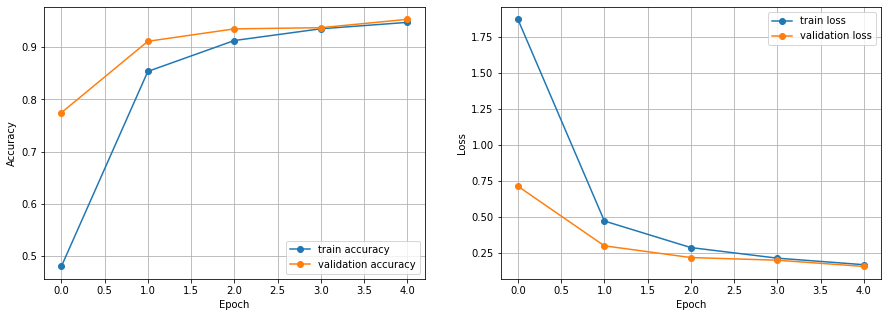

In [31]:
#without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [32]:
#without normalization
test_loss4, test_acc4 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 3s 11ms/step - loss: 0.1560 - accuracy: 0.9540

Test accuracy: 0.9886000156402588


In [33]:
# without normalization
predictions4 = model.predict(x2_test)

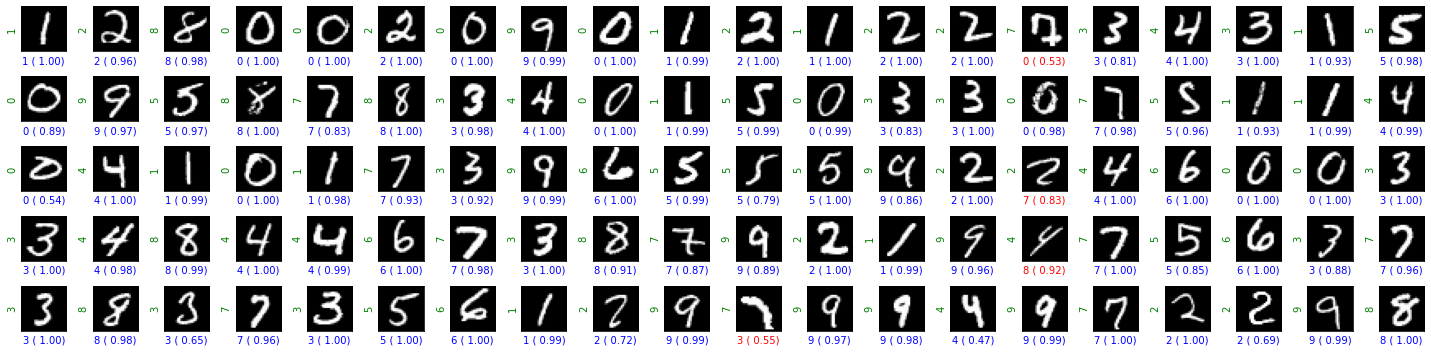

In [34]:
#without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions4 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions4[i]) 
        confidence = predictions4[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#**RMSProp Optimizer**

#**Normalized Data**

In [35]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [36]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [37]:
#normalize data
h5 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 59s 156ms/step - loss: 0.2769 - accuracy: 0.9110 - val_loss: 0.1105 - val_accuracy: 0.9663
Epoch 2/5
375/375 [==============================] - 59s 156ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 3/5
375/375 [==============================] - 59s 156ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0484 - val_accuracy: 0.9865
Epoch 4/5
375/375 [==============================] - 58s 156ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 5/5
375/375 [==============================] - 58s 155ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0385 - val_accuracy: 0.9889


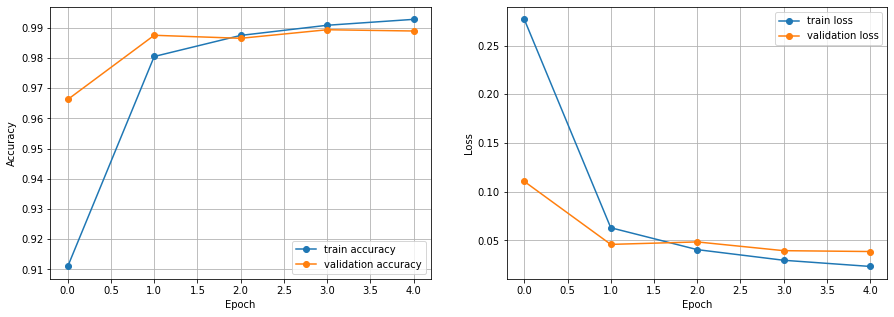

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [39]:
test_loss5, test_acc5 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0343 - accuracy: 0.9885

Test accuracy: 0.9850000143051147


In [40]:
predictions5 = model.predict(x_test)

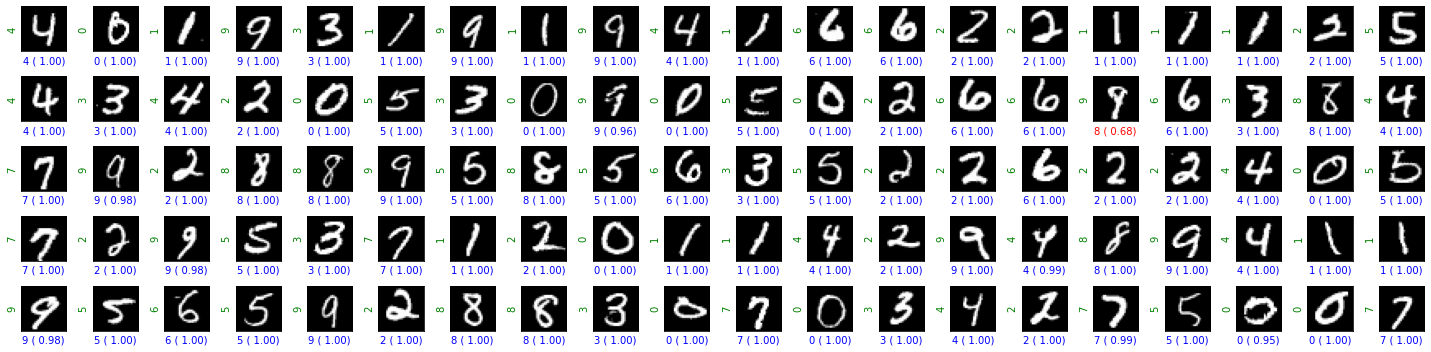

In [41]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions5 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions5[i]) 
        confidence = predictions5[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()


#**Without Normalization**

In [42]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [43]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [44]:
#without normalize data
h6 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 [==============================] - 60s 157ms/step - loss: 0.2733 - accuracy: 0.9130 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 2/5
375/375 [==============================] - 59s 158ms/step - loss: 0.0684 - accuracy: 0.9783 - val_loss: 0.0626 - val_accuracy: 0.9813
Epoch 3/5
375/375 [==============================] - 59s 157ms/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0463 - val_accuracy: 0.9854
Epoch 4/5
375/375 [==============================] - 59s 156ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 5/5
375/375 [==============================] - 59s 158ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0414 - val_accuracy: 0.9884


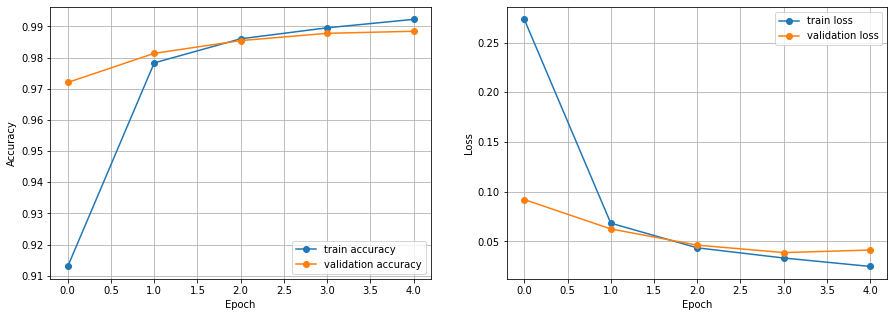

In [45]:
#without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [46]:
#without normalization
test_loss6, test_acc6 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 3s 11ms/step - loss: 0.0309 - accuracy: 0.9901

Test accuracy: 0.9886000156402588


In [47]:
#without normalization
predictions6 = model.predict(x2_test)

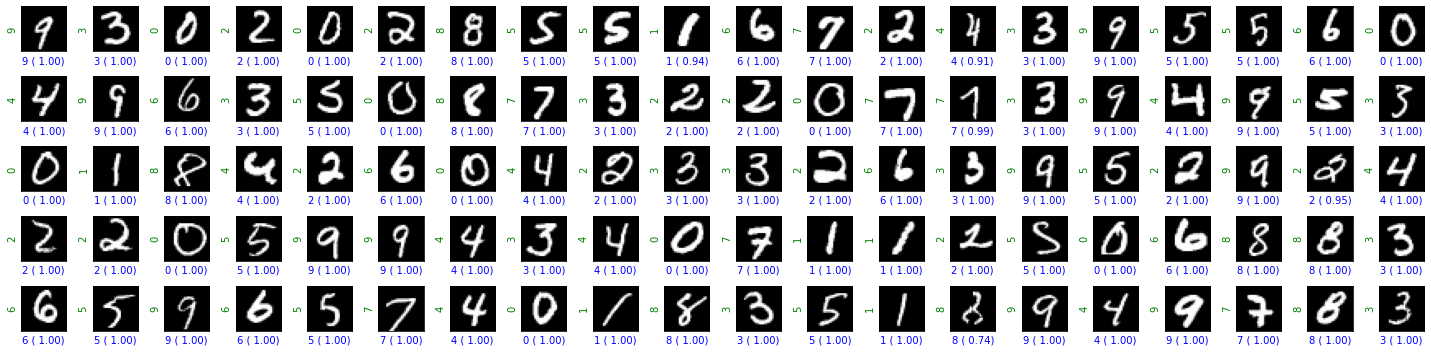

In [48]:
#without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions6 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions6[i]) 
        confidence = predictions6[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()